In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel(r'C:\Users\singh\OneDrive\Desktop\datascience\Decision Tree\heart_disease.xlsx',sheet_name = 'Heart_disease')

In [3]:
df
# Description
# Gender	Gender ; Male - 1, Female -0
# cp	Chest pain type
# trestbps	Resting blood pressure
# chol	cholesterol measure
# fbs	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg	"ecg observation at resting condition,   -- Value 0: normal
        # -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        # -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
# thalch	maximum heart rate achieved
# exang	exercise induced angina
# oldpeak	ST depression induced by exercise relative to rest
# slope	the slope of the peak exercise ST segment
# thal	Thal
# num	target [0=no heart disease; 1,2,3,4 = stages of heart disease ]


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df.shape

(908, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

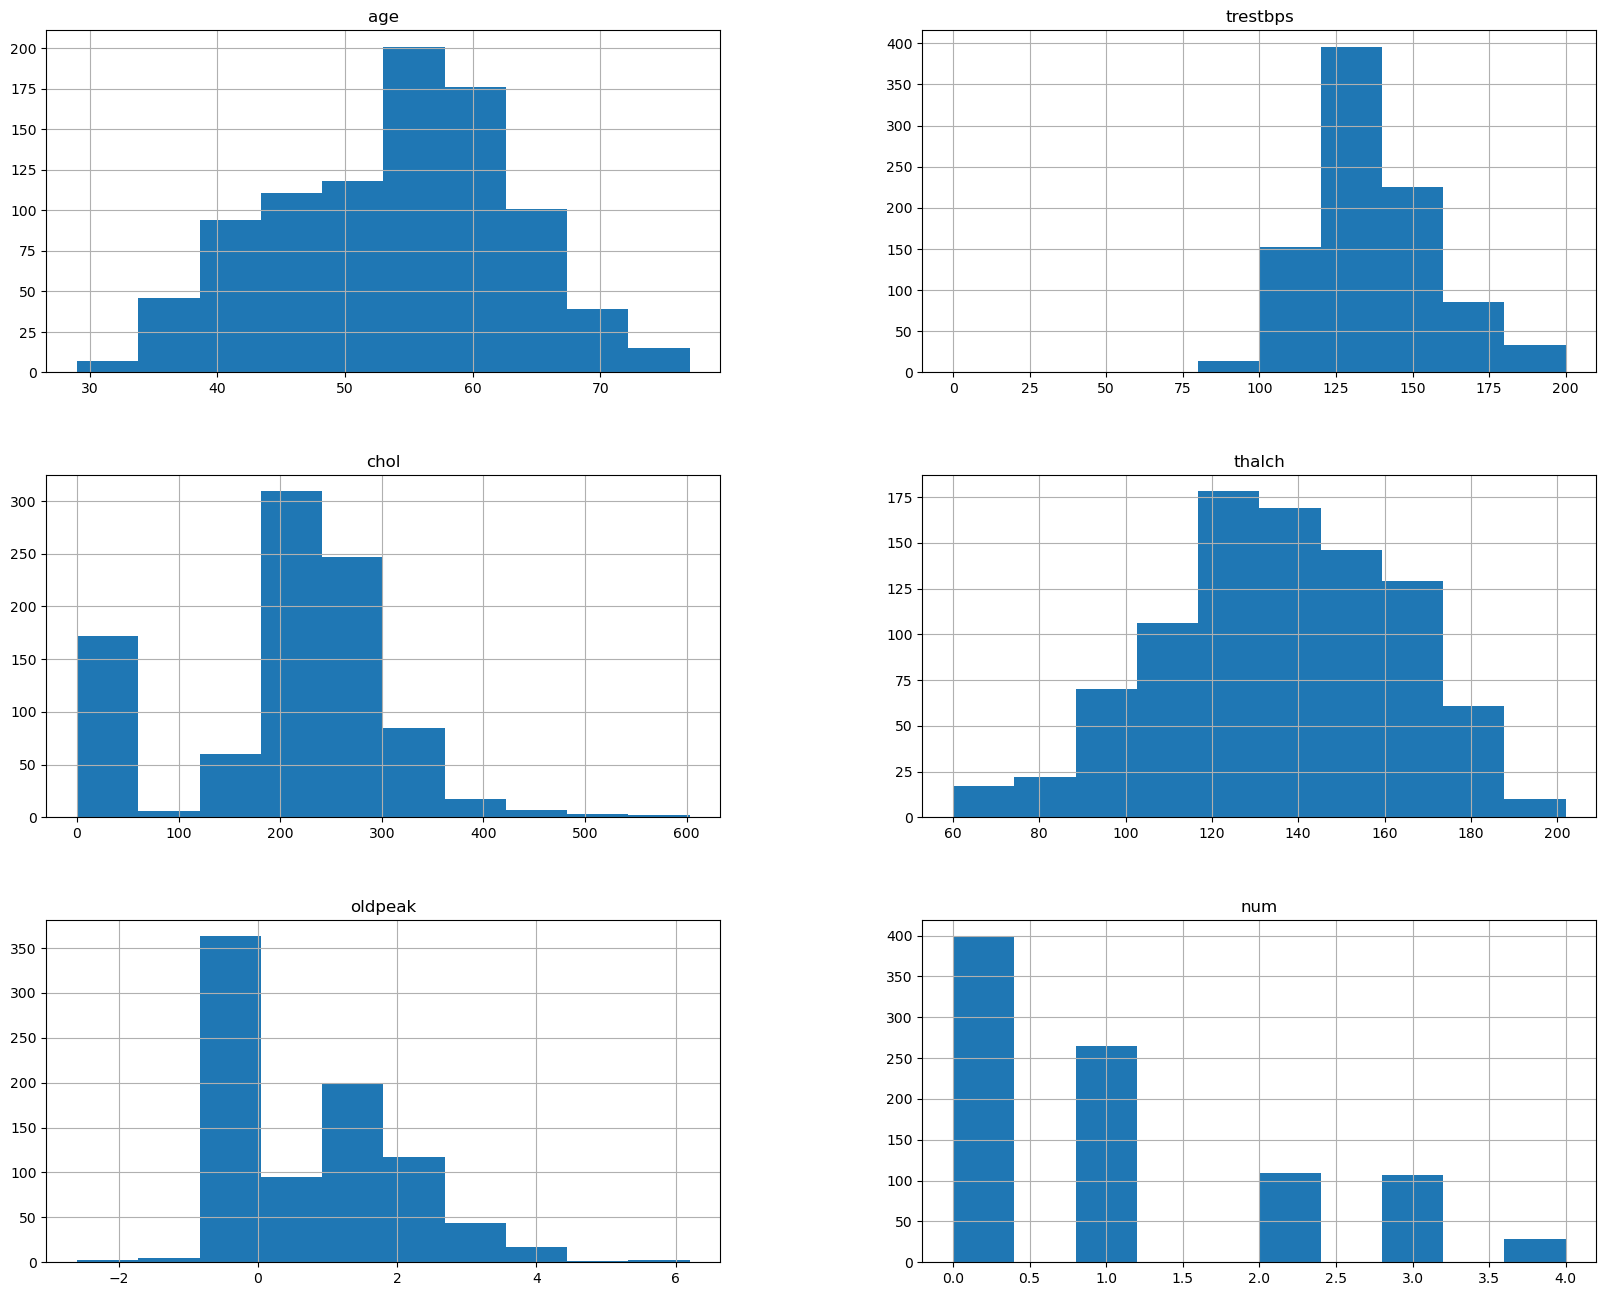

In [7]:
df.hist(figsize=(20, 16))

In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0


In [10]:
# treating the null values from the oldpeak column
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [11]:
# Imputation of missing values with median
median = df['oldpeak'].median()
median

0.5

In [12]:
# Replacing the null values with the median, as median is insensitive to ouliers
df['oldpeak']=df['oldpeak'].fillna(median)

In [13]:
# Re-checking for null values. 
df.isnull().sum()
# No null values found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


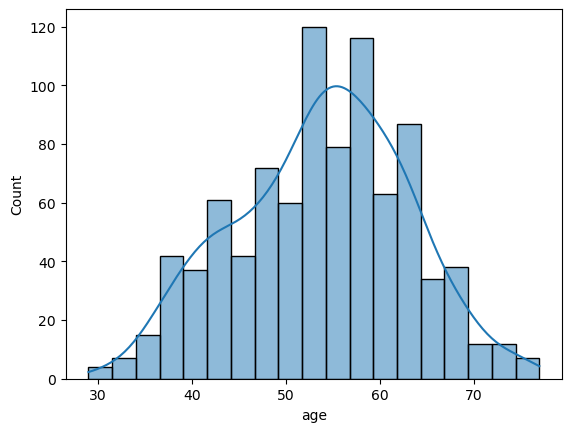

In [15]:
# visulaizing age column

sns.histplot(df['age'], kde=True)
plt.show()


<Axes: xlabel='age'>

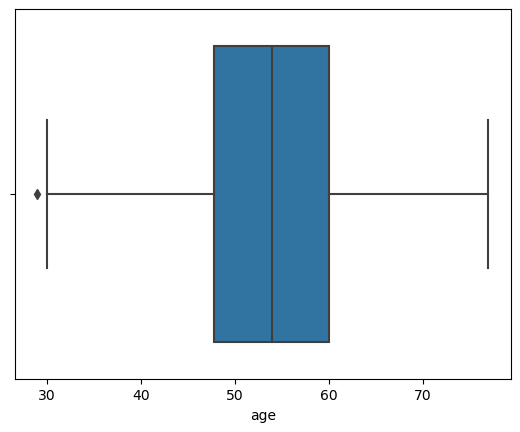

In [16]:
sns.boxplot(x=df['age'])

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

#  normalizing the age column
scaler.fit(df['age'].values.reshape(-1, 1))  # Reshape for single feature

# Transform the column using the fitted scaler
df['age'] = scaler.transform(df['age'].values.reshape(-1, 1))

# Now, the 'age' is scaled within the specified range
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.250000,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,0.583333,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,0.479167,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.583333,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


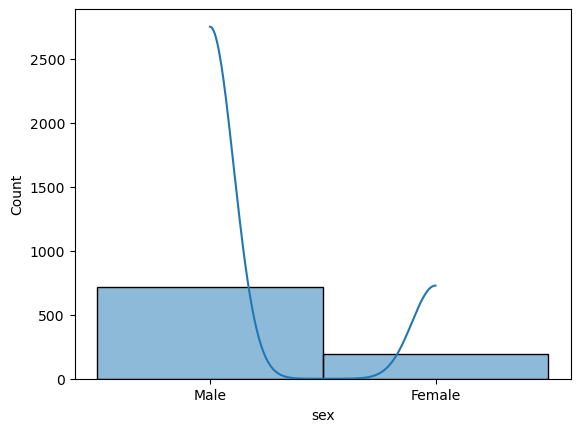

In [18]:
# visulaizing age column

sns.histplot(df['sex'], kde=True)
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fit the encoder on the chosen column 
encoder.fit(df['sex'])

# Transform the column using the fitted encoder
df['sex'] = encoder.transform(df['sex'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.250000,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,0.583333,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,0.479167,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.583333,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


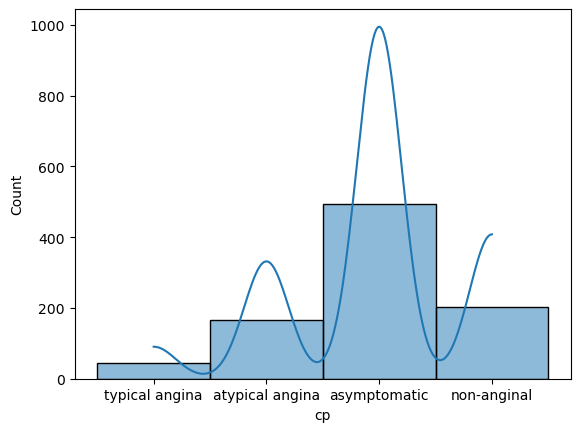

In [20]:
# visulaizing cp column

sns.histplot(df['cp'], kde=True)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fit the encoder on the chosen column 
encoder.fit(df['cp'])

# Transform the column using the fitted encoder
df['cp'] = encoder.transform(df['cp'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.250000,1,1,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,0.583333,1,0,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,0.479167,1,3,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.583333,1,0,110,201,False,normal,126,True,1.5,flat,fixed defect,0


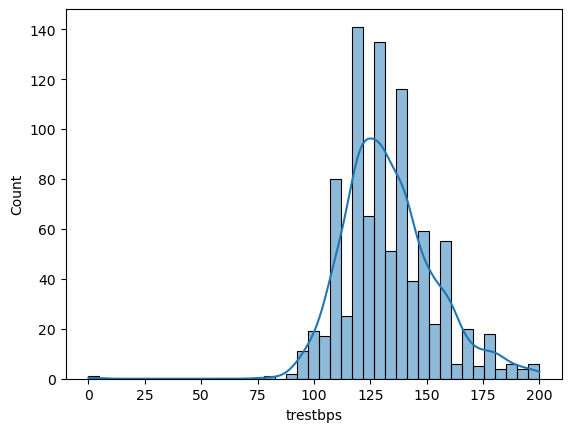

In [22]:
# # visulaizing trestbps column

sns.histplot(df['trestbps'], kde=True)
plt.show()

<Axes: xlabel='trestbps'>

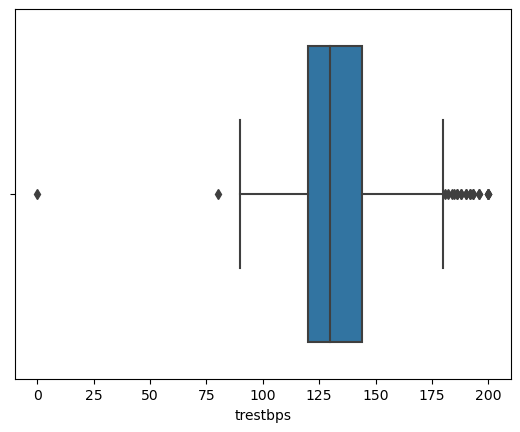

In [23]:
sns.boxplot(x=df['trestbps'])

In [24]:
# Treating outlier using IQR method
percentile25_trestbps = df['trestbps'].quantile(0.25)
percentile75_trestbps = df['trestbps'].quantile(0.75)
iqr_trestbps = percentile75_trestbps - percentile25_trestbps

In [25]:
upper_limit_trestbps = percentile75_trestbps + 1.5*iqr_trestbps
lower_limit_trestbps = percentile25_trestbps - 1.5*iqr_trestbps
print('upper_limit',upper_limit_trestbps)
print('lower_limit',lower_limit_trestbps)


upper_limit 180.0
lower_limit 84.0


In [26]:
# Capping outliers
df['trestbps'] = np.where(
    df['trestbps']>upper_limit_trestbps,upper_limit_trestbps,
    np.where(df['trestbps'] < lower_limit_trestbps,lower_limit_trestbps,
             df['trestbps']
            )
)
    

<Axes: xlabel='trestbps'>

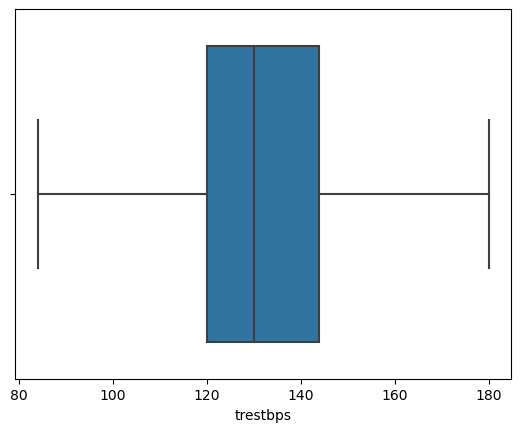

In [27]:
sns.boxplot(x=df['trestbps'])
# outliers has been removed from trestbps column

In [28]:
#  normalizing the trestbps column
scaler.fit(df['trestbps'].values.reshape(-1, 1))  # Reshape for single feature

# Transform the column using the fitted scaler
df['trestbps'] = scaler.transform(df['trestbps'].values.reshape(-1, 1))

# Now, the 'age' is scaled within the specified range
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.250000,1,1,0.531250,203,False,normal,132,False,0.0,flat,fixed defect,0
2,0.583333,1,0,0.583333,192,False,normal,148,False,0.4,flat,fixed defect,0
3,0.479167,1,3,0.354167,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.583333,1,0,0.270833,201,False,normal,126,True,1.5,flat,fixed defect,0


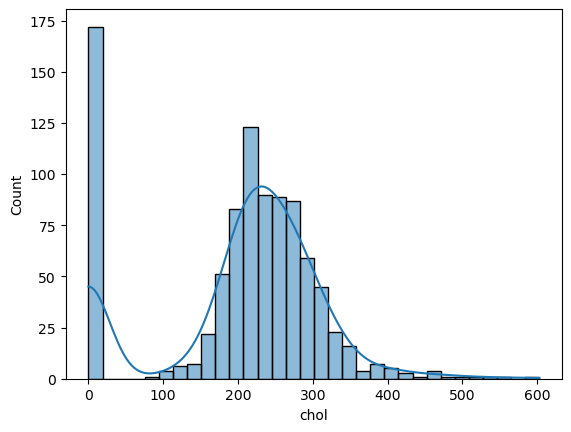

In [29]:
# # visulaizing chol column

sns.histplot(df['chol'], kde=True)
plt.show()

<Axes: xlabel='chol'>

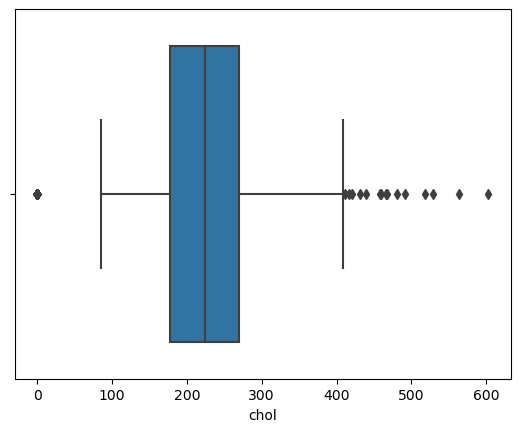

In [30]:
sns.boxplot(x=df['chol'])

In [31]:
df['chol'].skew()

-0.564765692042219

In [32]:
# Treating outlier using IQR method
percentile25_chol = df['chol'].quantile(0.25)
percentile75_chol = df['chol'].quantile(0.75)
iqr_chol = percentile75_chol - percentile25_chol

In [33]:
upper_limit_chol = percentile75_chol + 1.5*iqr_chol
lower_limit_chol = percentile25_chol - 1.5*iqr_chol
print('upper_limit',upper_limit_chol)
print('lower_limit',lower_limit_chol)

upper_limit 409.875
lower_limit 36.875


In [34]:
# Capping outliers
df['chol'] = np.where(
    df['chol']>upper_limit_chol,upper_limit_chol,
    np.where(df['chol'] < lower_limit_chol,lower_limit_chol,
             df['chol']
            )
)
    

<Axes: xlabel='chol'>

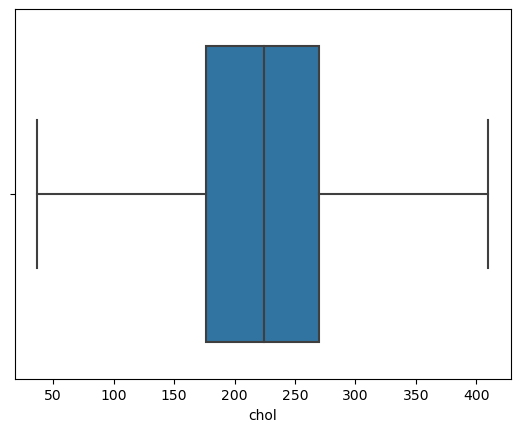

In [35]:
sns.boxplot(x=df['chol'])
# All the ouliers has been capped

In [36]:
#  normalizing the chol column
scaler.fit(df['chol'].values.reshape(-1, 1))  # Reshape for single feature

# Transform the column using the fitted scaler
df['chol'] = scaler.transform(df['chol'].values.reshape(-1, 1))

# Now, the 'chol' is scaled within the specified range
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.250000,1,1,0.531250,0.445375,False,normal,132,False,0.0,flat,fixed defect,0
2,0.583333,1,0,0.583333,0.415885,False,normal,148,False,0.4,flat,fixed defect,0
3,0.479167,1,3,0.354167,0.399799,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.583333,1,0,0.270833,0.440013,False,normal,126,True,1.5,flat,fixed defect,0


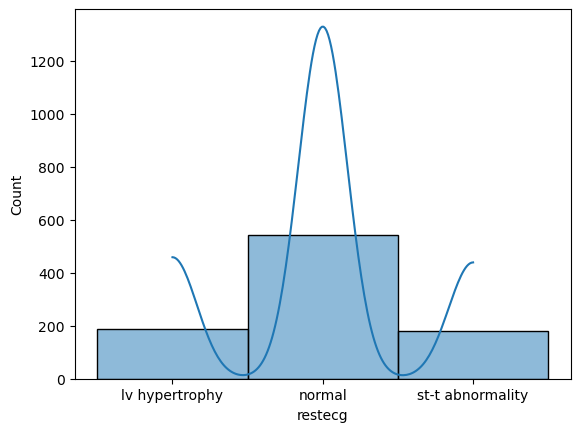

In [37]:
# visulaizing restecg column 
sns.histplot(df['restecg'],kde = True)
plt.show()

# no chnages is required for this column as this column is already readable by ML model

In [38]:
# Fit the encoder on the chosen column 
encoder.fit(df['restecg'])

# Transform the column using the fitted encoder
df['restecg'] = encoder.transform(df['restecg'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,0,150,False,2.3,downsloping,fixed defect,0
1,0.250000,1,1,0.531250,0.445375,False,1,132,False,0.0,flat,fixed defect,0
2,0.583333,1,0,0.583333,0.415885,False,1,148,False,0.4,flat,fixed defect,0
3,0.479167,1,3,0.354167,0.399799,False,0,190,False,0.0,flat,fixed defect,0
4,0.583333,1,0,0.270833,0.440013,False,1,126,True,1.5,flat,fixed defect,0


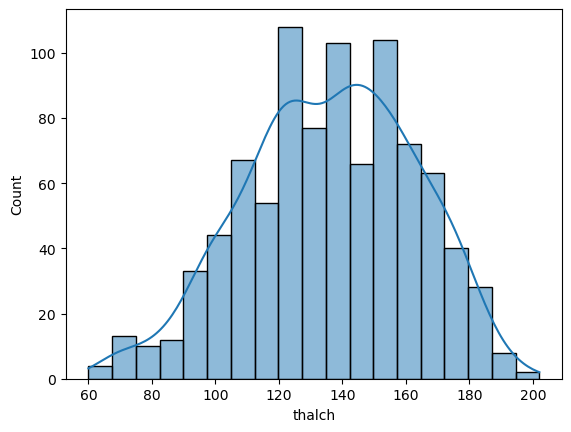

In [39]:
# visulaizing thalch column

sns.histplot(df['thalch'],kde = True)
plt.show()


<Axes: xlabel='thalch'>

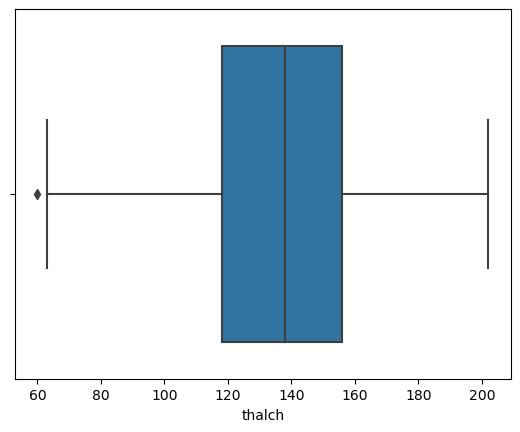

In [40]:
sns.boxplot(x=df['thalch'])
# very few outliers are there, but Decision tree can handle some amount of outliers so no processing is required.


In [41]:
df['thalch'].skew()

-0.21955477484333802

In [42]:
#  normalizing the chol column
scaler.fit(df['thalch'].values.reshape(-1, 1))  # Reshape for single feature

# Transform the column using the fitted scaler
df['thalch'] = scaler.transform(df['thalch'].values.reshape(-1, 1))

# Now, the 'chol' is scaled within the specified range
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,0,0.633803,False,2.3,downsloping,fixed defect,0
1,0.250000,1,1,0.531250,0.445375,False,1,0.507042,False,0.0,flat,fixed defect,0
2,0.583333,1,0,0.583333,0.415885,False,1,0.619718,False,0.4,flat,fixed defect,0
3,0.479167,1,3,0.354167,0.399799,False,0,0.915493,False,0.0,flat,fixed defect,0
4,0.583333,1,0,0.270833,0.440013,False,1,0.464789,True,1.5,flat,fixed defect,0


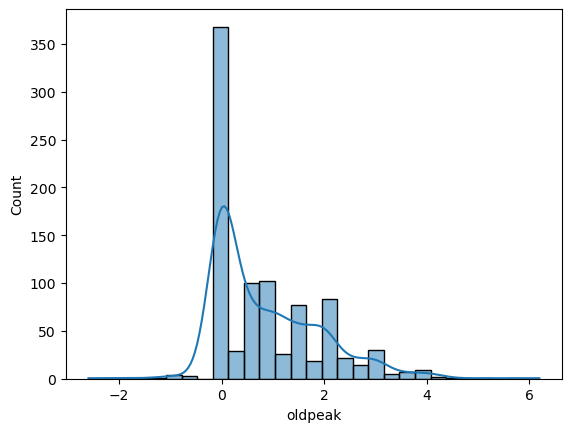

In [43]:
# visulaizing oldpeak column

sns.histplot(df['oldpeak'],kde = True)
plt.show()


<Axes: xlabel='oldpeak'>

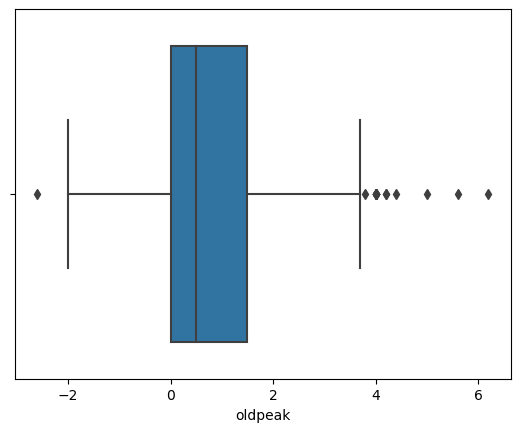

In [44]:
sns.boxplot(x=df['oldpeak'])

In [45]:
# Treating outlier using IQR method
percentile25_oldpeak = df['oldpeak'].quantile(0.25)
percentile75_oldpeak = df['oldpeak'].quantile(0.75)
iqr_oldpeak = percentile75_oldpeak - percentile25_oldpeak

In [46]:
upper_limit_oldpeak = percentile75_oldpeak + 1.5*iqr_oldpeak
lower_limit_oldpeak = percentile25_oldpeak - 1.5*iqr_oldpeak
print('upper_limit',upper_limit_oldpeak)
print('lower_limit',lower_limit_oldpeak)

upper_limit 3.75
lower_limit -2.25


In [47]:
# Capping outliers
df['oldpeak'] = np.where(
    df['oldpeak']>upper_limit_oldpeak,upper_limit_oldpeak,
    np.where(df['oldpeak'] < lower_limit_oldpeak,lower_limit_oldpeak,
             df['oldpeak']
            )
)
    

<Axes: xlabel='oldpeak'>

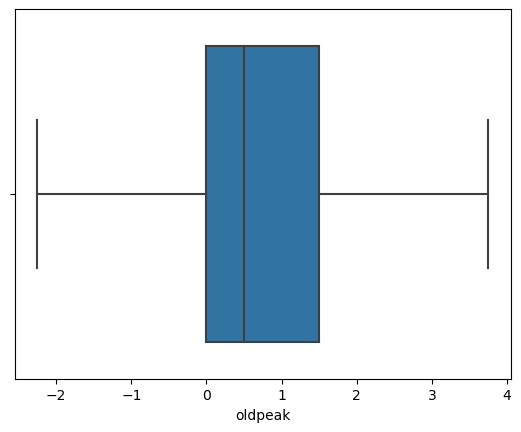

In [48]:
sns.boxplot(x=df['oldpeak'])
# Outliers capped 

In [49]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,0,0.633803,False,2.3,downsloping,fixed defect,0
1,0.250000,1,1,0.531250,0.445375,False,1,0.507042,False,0.0,flat,fixed defect,0
2,0.583333,1,0,0.583333,0.415885,False,1,0.619718,False,0.4,flat,fixed defect,0


In [50]:
#  normalizing the chol column
scaler.fit(df['oldpeak'].values.reshape(-1, 1))  # Reshape for single feature

# Transform the column using the fitted scaler
df['oldpeak'] = scaler.transform(df['oldpeak'].values.reshape(-1, 1))

# Now, the 'chol' is scaled within the specified range
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,0,0.633803,False,0.758333,downsloping,fixed defect,0
1,0.250000,1,1,0.531250,0.445375,False,1,0.507042,False,0.375000,flat,fixed defect,0
2,0.583333,1,0,0.583333,0.415885,False,1,0.619718,False,0.441667,flat,fixed defect,0
3,0.479167,1,3,0.354167,0.399799,False,0,0.915493,False,0.375000,flat,fixed defect,0
4,0.583333,1,0,0.270833,0.440013,False,1,0.464789,True,0.625000,flat,fixed defect,0


In [51]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [52]:
# Encoding the slope column
# Fit the encoder on the chosen column 
encoder.fit(df['slope'])

# Transform the column using the fitted encoder
df['slope'] = encoder.transform(df['slope'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,0,0.633803,False,0.758333,0,fixed defect,0
1,0.250000,1,1,0.531250,0.445375,False,1,0.507042,False,0.375000,1,fixed defect,0
2,0.583333,1,0,0.583333,0.415885,False,1,0.619718,False,0.441667,1,fixed defect,0
3,0.479167,1,3,0.354167,0.399799,False,0,0.915493,False,0.375000,1,fixed defect,0
4,0.583333,1,0,0.270833,0.440013,False,1,0.464789,True,0.625000,1,fixed defect,0


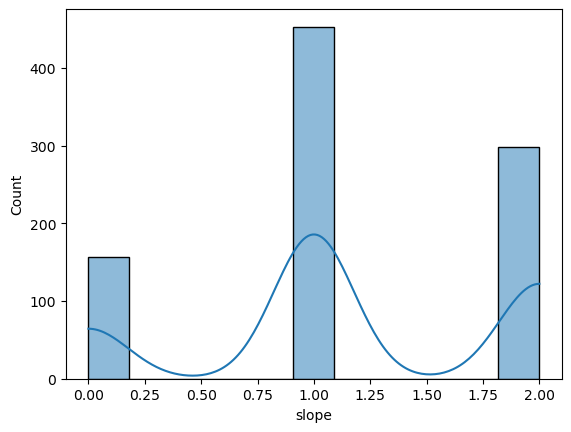

In [53]:
# # visulaizing slope column

sns.histplot(df['slope'],kde = True)
plt.show()


In [54]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [55]:
# Encoding the thal column
# Fit the encoder on the chosen column 
encoder.fit(df['thal'])

# Transform the column using the fitted encoder
df['thal'] = encoder.transform(df['thal'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,True,0,0.633803,False,0.758333,0,0,0
1,0.250000,1,1,0.531250,0.445375,False,1,0.507042,False,0.375000,1,0,0
2,0.583333,1,0,0.583333,0.415885,False,1,0.619718,False,0.441667,1,0,0
3,0.479167,1,3,0.354167,0.399799,False,0,0.915493,False,0.375000,1,0,0
4,0.583333,1,0,0.270833,0.440013,False,1,0.464789,True,0.625000,1,0,0


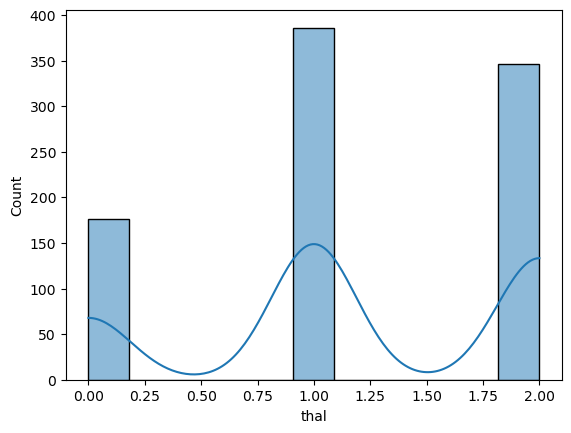

In [56]:
# visulaizing thal column

sns.histplot(df['thal'],kde = True)
plt.show()


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'restecg'}>],
       [<Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >]], dtype=object)

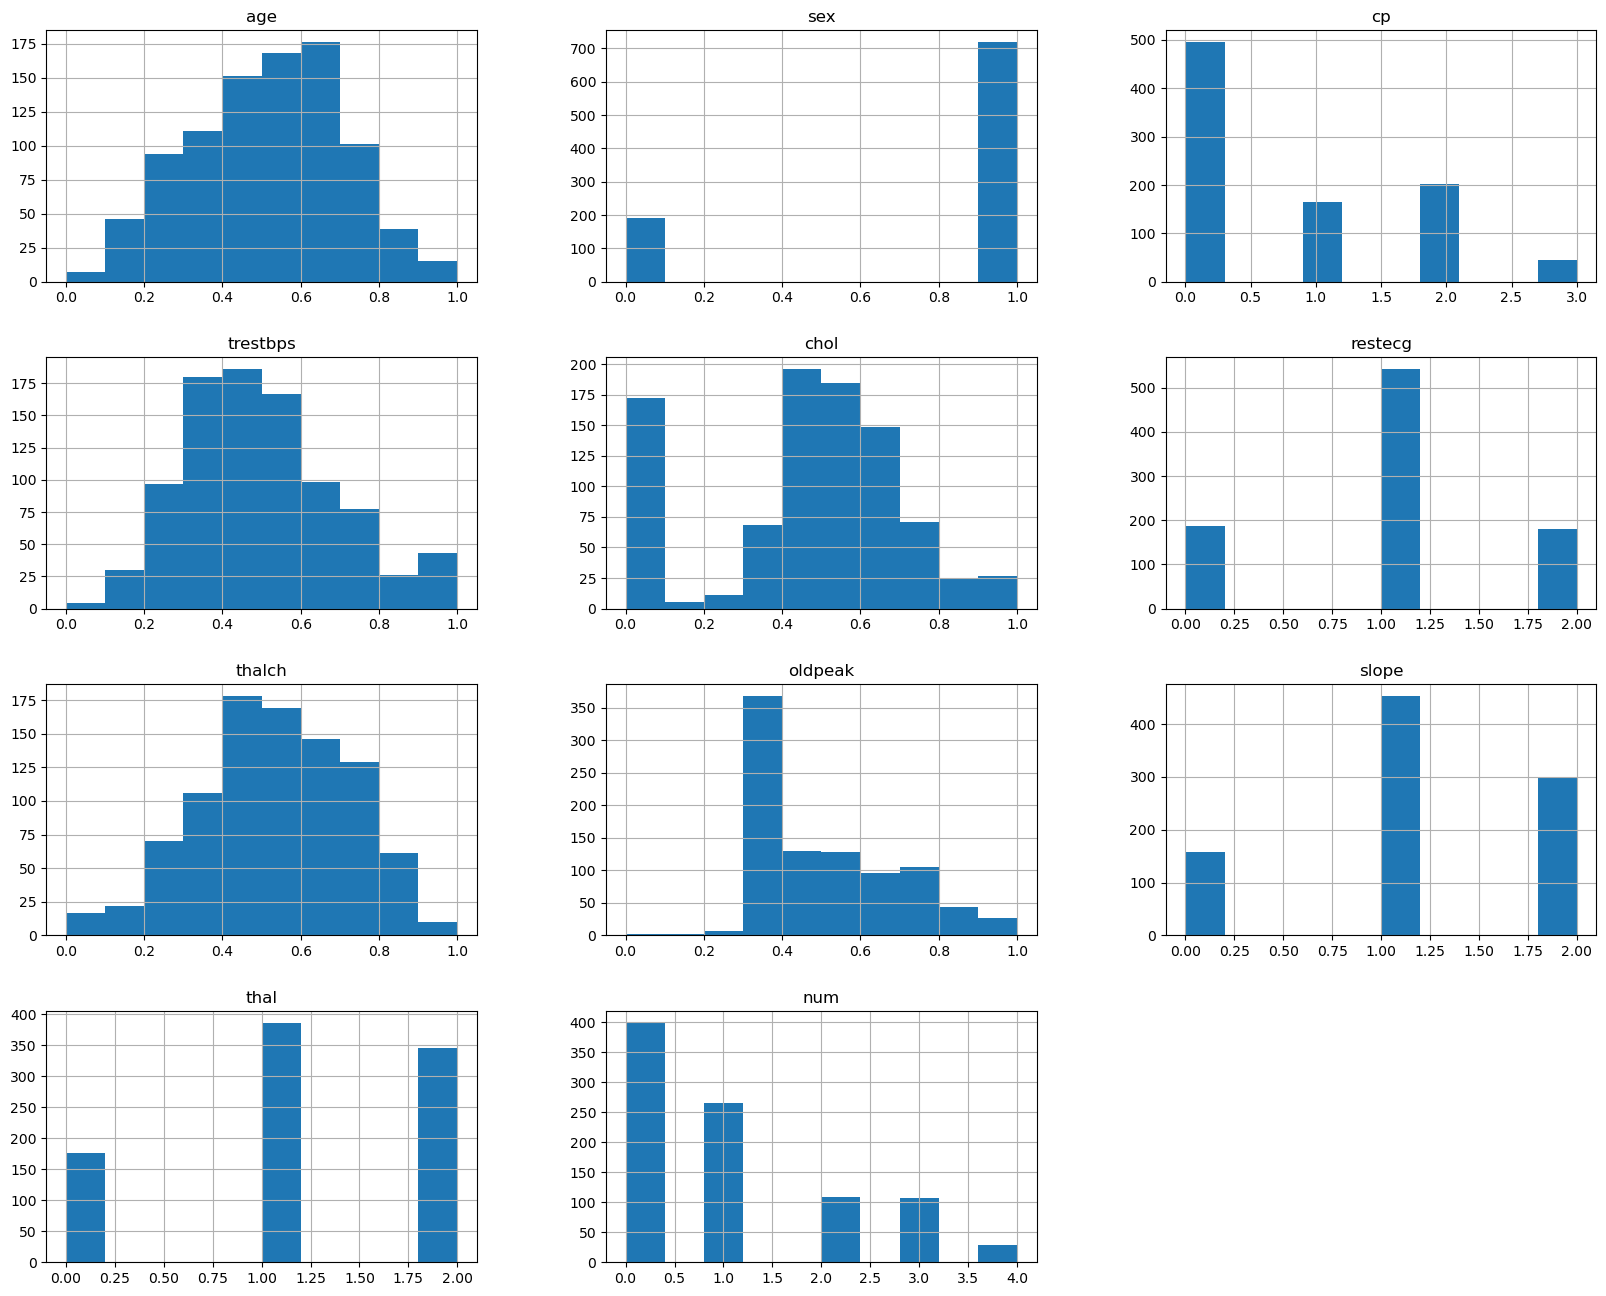

In [57]:
# Visulaizing all the columns of the data set
df.hist(figsize=(20, 16))

In [58]:
# Encoding the thal column
# Fit the encoder on the chosen column 
encoder.fit(df['fbs'])

# Transform the column using the fitted encoder
df['fbs'] = encoder.transform(df['fbs'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,1,0,0.633803,False,0.758333,0,0,0
1,0.250000,1,1,0.531250,0.445375,0,1,0.507042,False,0.375000,1,0,0
2,0.583333,1,0,0.583333,0.415885,0,1,0.619718,False,0.441667,1,0,0
3,0.479167,1,3,0.354167,0.399799,0,0,0.915493,False,0.375000,1,0,0
4,0.583333,1,0,0.270833,0.440013,0,1,0.464789,True,0.625000,1,0,0


In [60]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [61]:
df['exang'] = df['exang'].replace('FALSE', False)


In [62]:
df['exang'] = df['exang'].replace('TURE', True)

In [63]:
df['exang'].unique()

array([False,  True])

In [64]:
df['exang'] = df['exang'].replace(True,True)

In [65]:
df['exang'].unique()

array([False,  True])

In [66]:
# Encoding the thal column
# Fit the encoder on the chosen column 
encoder.fit(df['exang'])

# Transform the column using the fitted encoder
df['exang'] = encoder.transform(df['exang'])

# Now, the workclass is encoded with numerical labels
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.708333,1,3,0.635417,0.525804,1,0,0.633803,0,0.758333,0,0,0
1,0.250000,1,1,0.531250,0.445375,0,1,0.507042,0,0.375000,1,0,0
2,0.583333,1,0,0.583333,0.415885,0,1,0.619718,0,0.441667,1,0,0
3,0.479167,1,3,0.354167,0.399799,0,0,0.915493,0,0.375000,1,0,0
4,0.583333,1,0,0.270833,0.440013,0,1,0.464789,1,0.625000,1,0,0


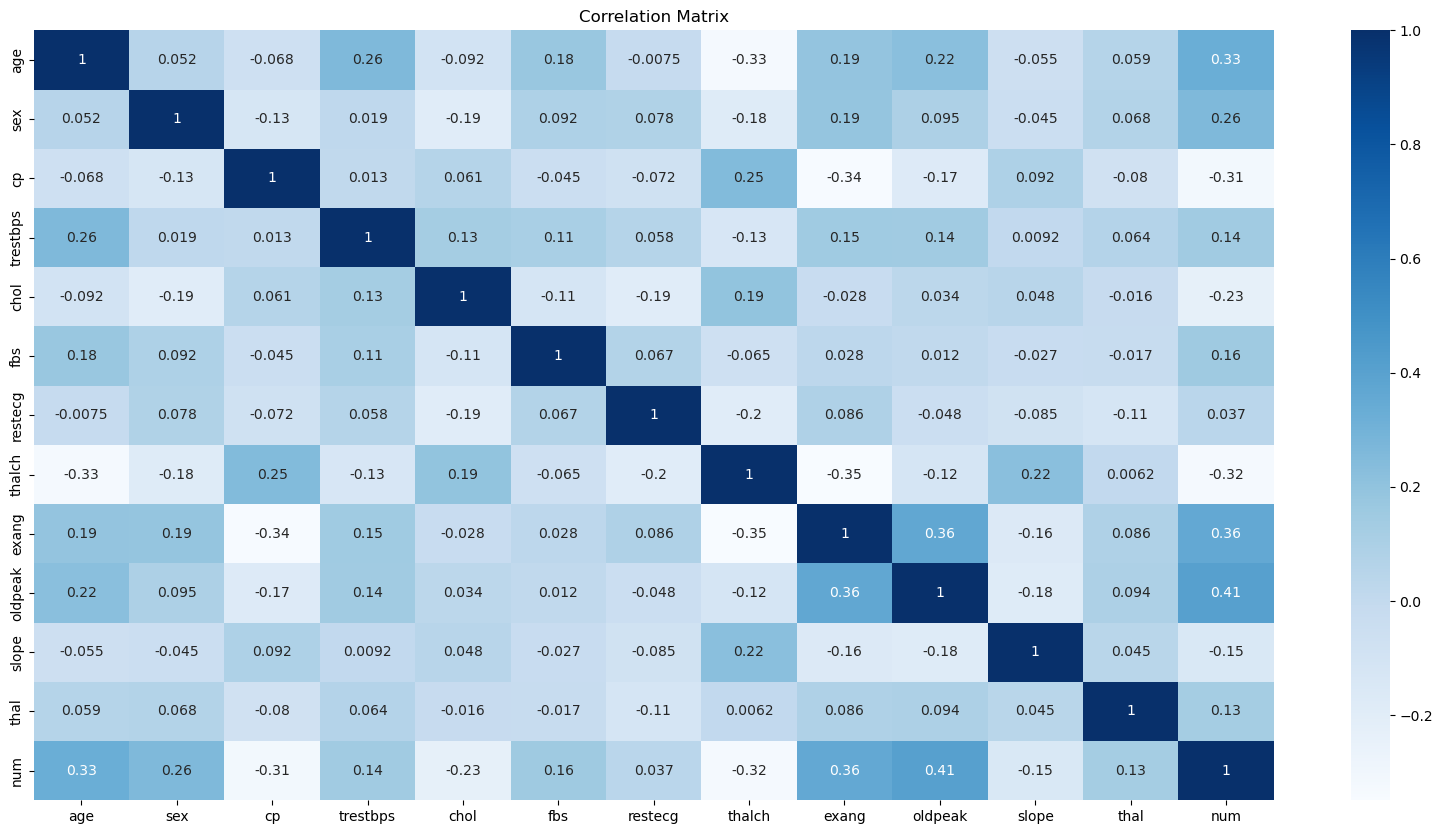

In [67]:
# Plotting the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [68]:
# Decision Tree
# A Decision Tree is a supervised machine learning algorithm that recursively splits the dataset into subsets based on the most significant attribute, creating a tree-like structure of decisions to predict the target variable.
X=df.iloc[:,0:12]
Y=df['num']

In [69]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.708333,1,3,0.635417,0.525804,1,0,0.633803,0,0.758333,0,0
1,0.250000,1,1,0.531250,0.445375,0,1,0.507042,0,0.375000,1,0
2,0.583333,1,0,0.583333,0.415885,0,1,0.619718,0,0.441667,1,0
3,0.479167,1,3,0.354167,0.399799,0,0,0.915493,0,0.375000,1,0
4,0.583333,1,0,0.270833,0.440013,0,1,0.464789,1,0.625000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.500000,1,0,0.427083,0.000000,0,1,0.422535,0,0.625000,2,2
904,0.687500,1,0,0.854167,0.356903,0,2,0.422535,1,0.875000,1,2
905,0.562500,1,2,0.895833,0.000000,0,0,0.443662,1,0.791667,0,1
906,0.562500,1,2,0.625000,0.458780,1,2,0.316901,1,0.458333,0,0


In [70]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [71]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=2023)
x_train.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
426,0.708333,0,0,0.250000,0.622319,0,1,0.767606,1,0.675000,1,1
590,0.541667,1,1,0.791667,0.683981,1,1,0.584507,1,0.708333,1,0
558,0.625000,1,0,0.416667,0.198727,0,1,0.401408,1,0.541667,1,1
825,0.479167,1,0,0.427083,0.469504,0,1,0.760563,0,0.541667,2,2
259,0.458333,0,2,0.270833,0.410523,0,1,0.422535,0,0.375000,0,1
38,0.291667,0,2,0.395833,0.472185,0,1,0.739437,0,0.408333,1,1
269,0.520833,0,1,0.687500,0.517761,0,1,0.492958,0,0.375000,1,1
141,0.250000,0,2,0.291667,0.619638,0,0,0.788732,1,0.375000,2,1
332,0.520833,0,1,0.479167,0.579424,0,2,0.669014,0,0.375000,0,2
443,0.604167,1,0,0.375000,0.000000,0,0,0.323944,1,0.625000,0,2


In [72]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.036)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.036, criterion='entropy')

In [73]:
path = model.cost_complexity_pruning_path(x_train,y_train)

In [74]:
alphas = path["ccp_alphas"]

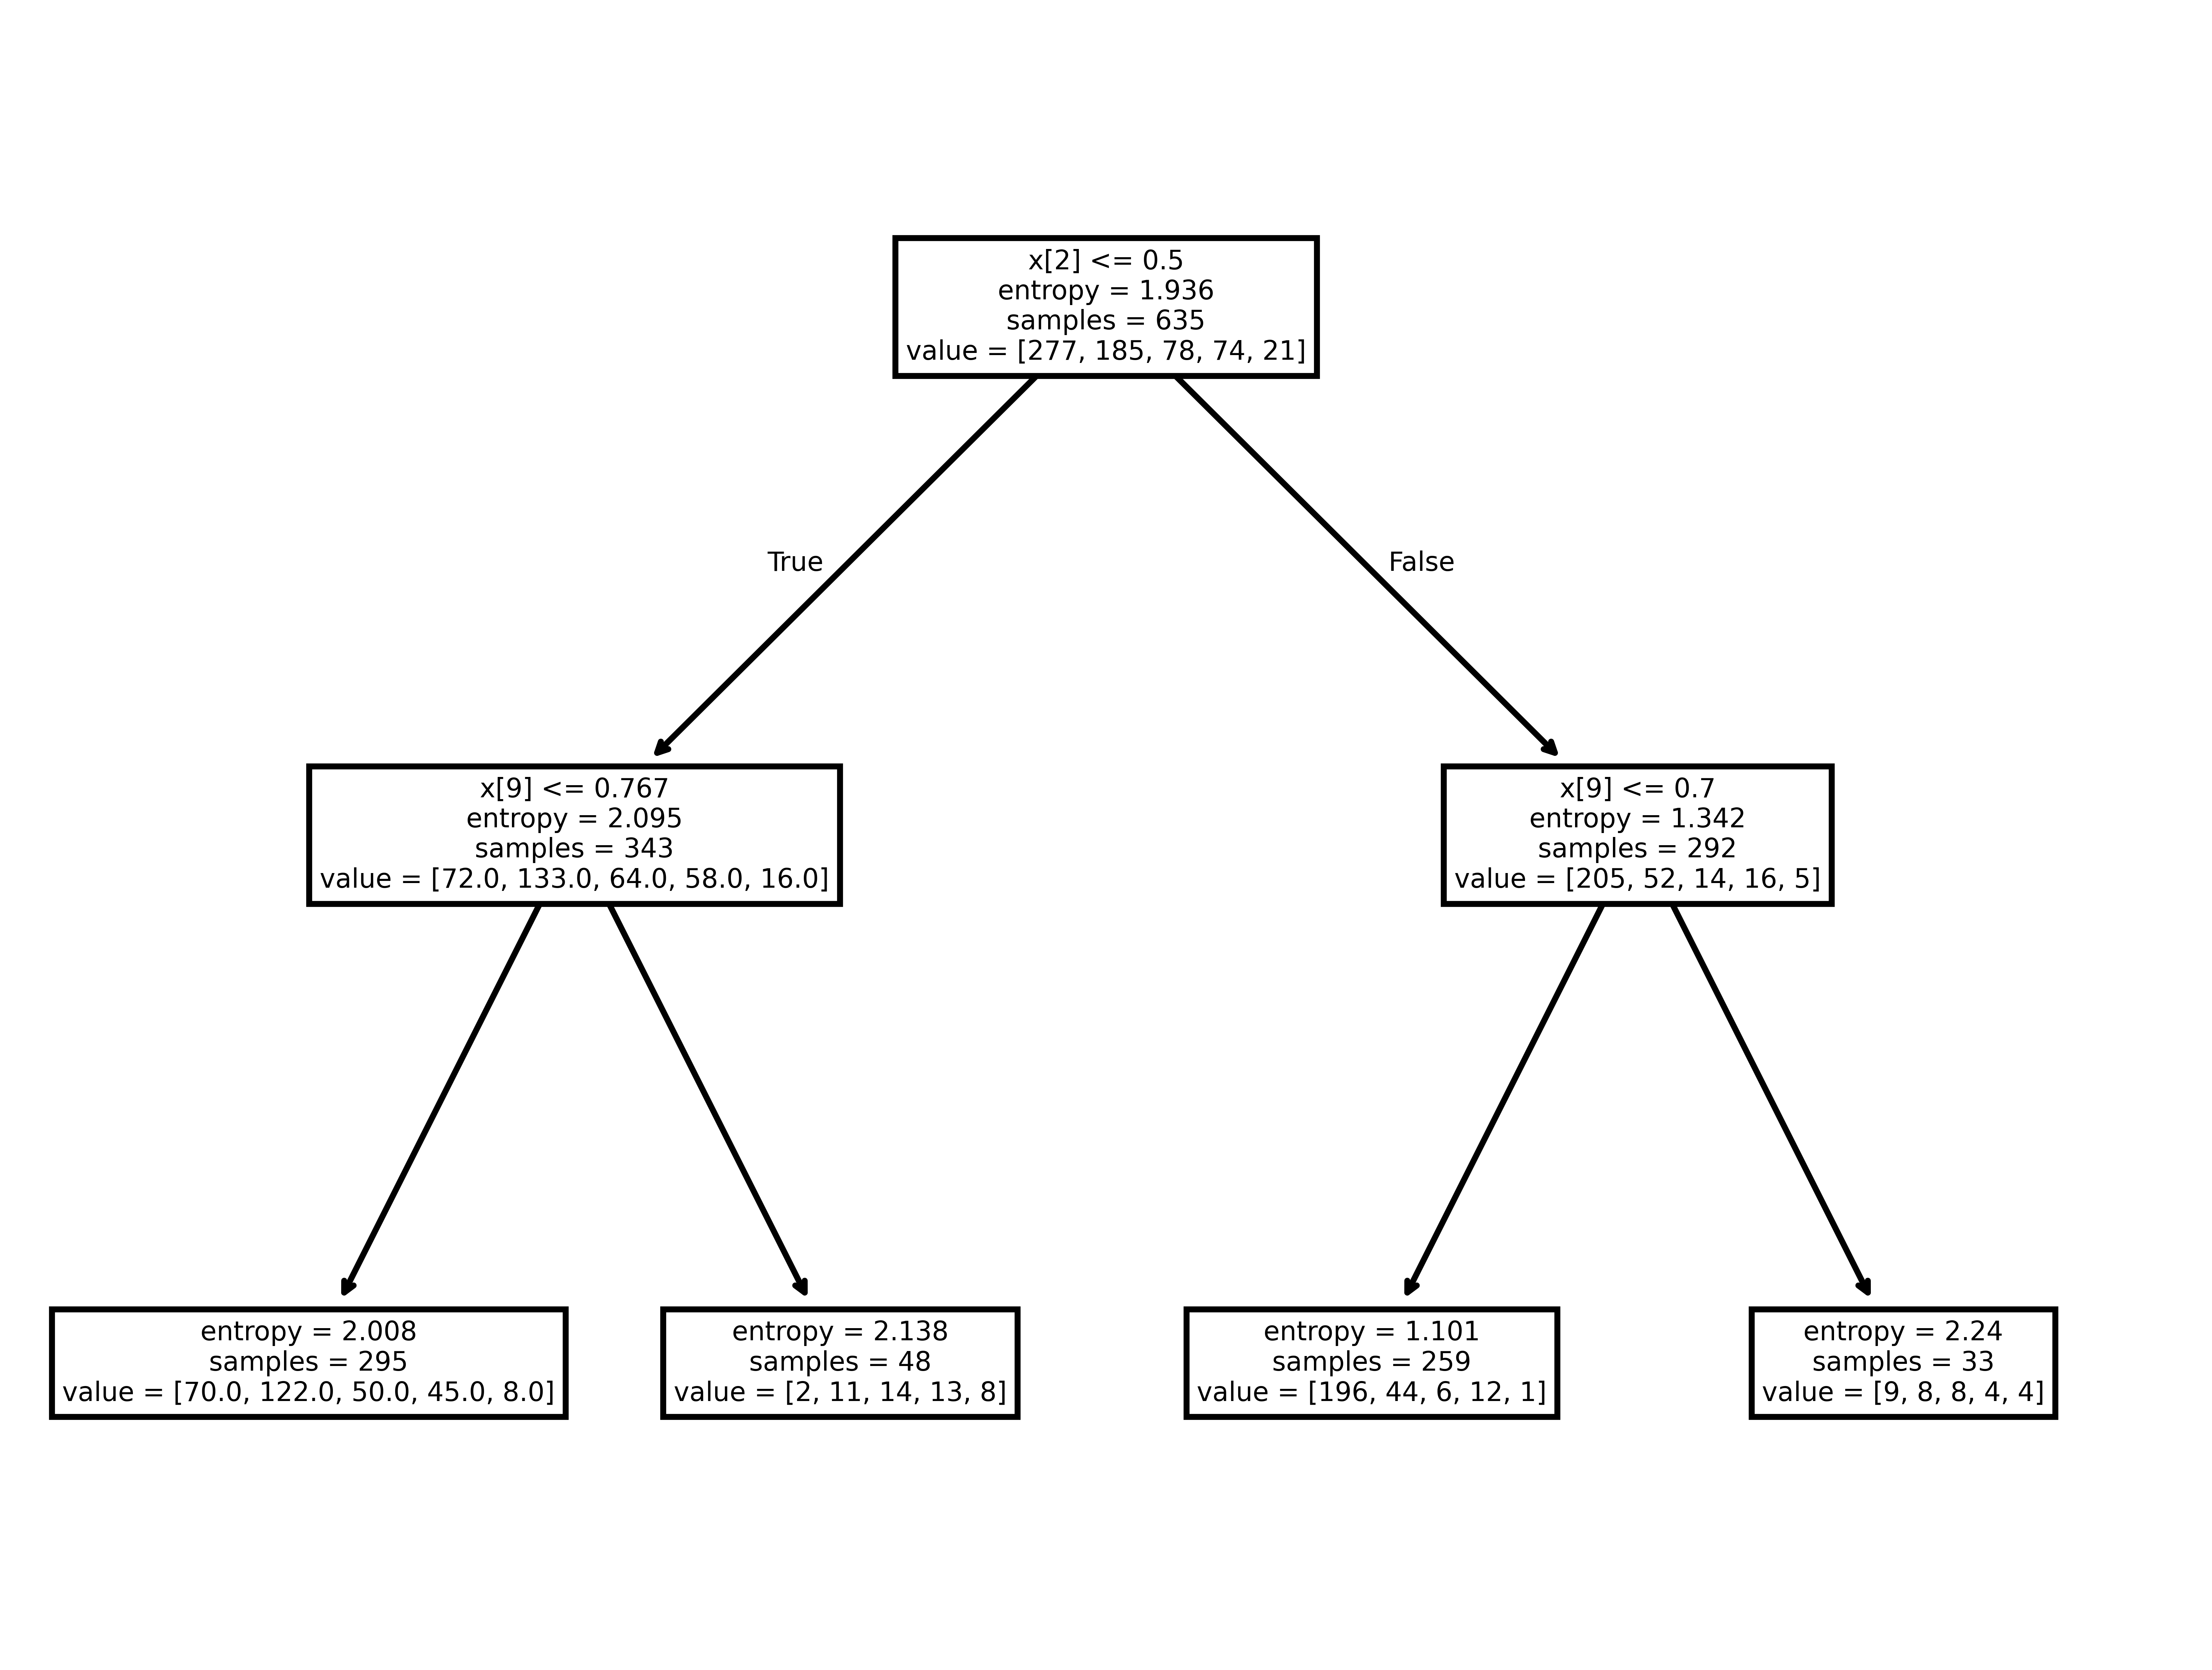

In [75]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [78]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
# pd.Series(preds).value_counts() # getting the count of each category 
preds

array([1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 2, 1, 1, 1], dtype=int64)

In [79]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       122
           1       0.43      0.71      0.54        80
           2       0.20      0.13      0.16        31
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         7

    accuracy                           0.56       273
   macro avg       0.28      0.32      0.29       273
weighted avg       0.49      0.56      0.51       273



C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
# Prediction on train data

pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       277
           1       0.41      0.66      0.51       185
           2       0.29      0.18      0.22        78
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00        21

    accuracy                           0.54       635
   macro avg       0.28      0.32      0.29       635
weighted avg       0.46      0.54      0.49       635



C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
alphas

array([0.        , 0.00255521, 0.00255521, 0.00255521, 0.00284224,
       0.00299234, 0.00305811, 0.00307097, 0.00314961, 0.00314961,
       0.00314961, 0.00314961, 0.00314961, 0.00314961, 0.00314961,
       0.00314961, 0.00314961, 0.00314961, 0.00314961, 0.00314961,
       0.00314961, 0.00314961, 0.00314961, 0.00314961, 0.00337277,
       0.00382264, 0.00382264, 0.00398319, 0.00419948, 0.00419948,
       0.00433841, 0.00433841, 0.00433841, 0.00433841, 0.00433841,
       0.00433841, 0.00433841, 0.00433841, 0.00433841, 0.00433841,
       0.00433841, 0.00433841, 0.00433841, 0.00433841, 0.00433841,
       0.00433841, 0.00433841, 0.00433841, 0.0046262 , 0.00463861,
       0.00468225, 0.00472219, 0.00472441, 0.0047552 , 0.00493997,
       0.00511041, 0.00511041, 0.00511041, 0.00511041, 0.00511041,
       0.00511041, 0.00511041, 0.00511041, 0.00511041, 0.00517631,
       0.00521819, 0.00543039, 0.00563436, 0.00568447, 0.00568447,
       0.00568447, 0.00568447, 0.00568447, 0.00568447, 0.00568

In [82]:
for each in alphas:
    model = DecisionTreeClassifier(criterion = 'entropy',ccp_alpha=each)
    model.fit(x_train,y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    print(classification_report(y_train,train_predict))
    print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        21

    accuracy                           1.00       635
   macro avg       1.00      1.00      1.00       635
weighted avg       1.00      1.00      1.00       635

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       122
           1       0.38      0.41      0.40        80
           2       0.21      0.19      0.20        31
           3       0.34      0.36      0.35        33
           4       0.20      0.29      0.24         7

    accuracy                           0.48       273
   macro avg       0.37      0.38      0.37       273
weighted avg       0.50      0.48      0.49       273

              precisio

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       277
           1       0.94      0.96      0.95       185
           2       0.95      0.96      0.96        78
           3       0.97      0.84      0.90        74
           4       1.00      0.95      0.98        21

    accuracy                           0.96       635
   macro avg       0.96      0.94      0.95       635
weighted avg       0.96      0.96      0.96       635

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       122
           1       0.41      0.41      0.41        80
           2       0.17      0.19      0.18        31
           3       0.30      0.30      0.30        33
           4       0.25      0.29      0.27         7

    accuracy                           0.48       273
   macro avg       0.36      0.37      0.37       273
weighted avg       0.49      0.48      0.48       273

              precisio

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       277
           1       0.94      0.97      0.95       185
           2       0.96      0.95      0.95        78
           3       0.98      0.85      0.91        74
           4       1.00      0.90      0.95        21

    accuracy                           0.96       635
   macro avg       0.97      0.93      0.95       635
weighted avg       0.96      0.96      0.96       635

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       122
           1       0.44      0.44      0.44        80
           2       0.20      0.19      0.20        31
           3       0.41      0.42      0.42        33
           4       0.30      0.43      0.35         7

    accuracy                           0.52       273
   macro avg       0.41      0.43      0.42       273
weighted avg       0.52      0.52      0.52       273

              precisio

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       277
           1       0.88      0.93      0.90       185
           2       0.90      0.90      0.90        78
           3       0.95      0.74      0.83        74
           4       1.00      0.81      0.89        21

    accuracy                           0.91       635
   macro avg       0.93      0.87      0.89       635
weighted avg       0.91      0.91      0.91       635

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       122
           1       0.38      0.41      0.39        80
           2       0.14      0.13      0.14        31
           3       0.37      0.33      0.35        33
           4       0.25      0.29      0.27         7

    accuracy                           0.47       273
   macro avg       0.36      0.36      0.36       273
weighted avg       0.47      0.47      0.47       273

              precisio

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       277
           1       0.86      0.94      0.89       185
           2       0.90      0.90      0.90        78
           3       0.98      0.70      0.82        74
           4       1.00      0.81      0.89        21

    accuracy                           0.91       635
   macro avg       0.93      0.86      0.89       635
weighted avg       0.91      0.91      0.91       635

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       122
           1       0.39      0.42      0.41        80
           2       0.18      0.16      0.17        31
           3       0.33      0.30      0.32        33
           4       0.25      0.29      0.27         7

    accuracy                           0.48       273
   macro avg       0.36      0.37      0.36       273
weighted avg       0.48      0.48      0.48       273

              precisio

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       277
           1       0.86      0.88      0.87       185
           2       0.80      0.83      0.82        78
           3       0.90      0.74      0.81        74
           4       1.00      0.67      0.80        21

    accuracy                           0.88       635
   macro avg       0.89      0.81      0.85       635
weighted avg       0.88      0.88      0.88       635

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       122
           1       0.35      0.36      0.36        80
           2       0.09      0.10      0.10        31
           3       0.41      0.39      0.40        33
           4       0.20      0.14      0.17         7

    accuracy                           0.47       273
   macro avg       0.35      0.34      0.34       273
weighted avg       0.47      0.47      0.47       273

              precisio

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       277
           1       0.84      0.88      0.86       185
           2       0.78      0.81      0.79        78
           3       0.85      0.68      0.75        74
           4       1.00      0.57      0.73        21

    accuracy                           0.87       635
   macro avg       0.88      0.78      0.81       635
weighted avg       0.87      0.87      0.87       635

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       122
           1       0.35      0.34      0.34        80
           2       0.09      0.10      0.09        31
           3       0.34      0.36      0.35        33
           4       0.20      0.14      0.17         7

    accuracy                           0.45       273
   macro avg       0.33      0.32      0.32       273
weighted avg       0.46      0.45      0.45       273

              precisio

              precision    recall  f1-score   support

           0       0.89      0.95      0.91       277
           1       0.82      0.84      0.83       185
           2       0.75      0.76      0.75        78
           3       0.84      0.64      0.72        74
           4       0.77      0.48      0.59        21

    accuracy                           0.84       635
   macro avg       0.81      0.73      0.76       635
weighted avg       0.84      0.84      0.84       635

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       122
           1       0.35      0.34      0.34        80
           2       0.09      0.10      0.09        31
           3       0.43      0.39      0.41        33
           4       0.20      0.14      0.17         7

    accuracy                           0.47       273
   macro avg       0.35      0.33      0.34       273
weighted avg       0.46      0.47      0.46       273

              precisio

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       122
           1       0.38      0.29      0.33        80
           2       0.07      0.06      0.07        31
           3       0.34      0.42      0.38        33
           4       0.25      0.14      0.18         7

    accuracy                           0.49       273
   macro avg       0.34      0.34      0.33       273
weighted avg       0.46      0.49      0.47       273

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       277
           1       0.81      0.72      0.77       185
           2       0.73      0.69      0.71        78
           3       0.75      0.64      0.69        74
           4       0.67      0.48      0.56        21

    accuracy                           0.80       635
   macro avg       0.76      0.70      0.72       635
weighted avg       0.80      0.80      0.79       635

              precisio

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       277
           1       0.80      0.71      0.75       185
           2       0.73      0.68      0.70        78
           3       0.73      0.61      0.66        74
           4       0.67      0.48      0.56        21

    accuracy                           0.79       635
   macro avg       0.75      0.68      0.71       635
weighted avg       0.79      0.79      0.78       635

              precision    recall  f1-score   support

           0       0.67      0.76      0.72       122
           1       0.38      0.29      0.33        80
           2       0.07      0.06      0.07        31
           3       0.37      0.45      0.41        33
           4       0.17      0.14      0.15         7

    accuracy                           0.49       273
   macro avg       0.33      0.34      0.33       273
weighted avg       0.47      0.49      0.48       273

              precisio

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       277
           1       0.75      0.65      0.70       185
           2       0.59      0.74      0.66        78
           3       0.70      0.50      0.58        74
           4       0.75      0.29      0.41        21

    accuracy                           0.75       635
   macro avg       0.72      0.62      0.64       635
weighted avg       0.75      0.75      0.74       635

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       122
           1       0.42      0.34      0.38        80
           2       0.15      0.16      0.16        31
           3       0.38      0.42      0.40        33
           4       0.00      0.00      0.00         7

    accuracy                           0.51       273
   macro avg       0.33      0.34      0.33       273
weighted avg       0.49      0.51      0.50       273

              precisio

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       277
           1       0.72      0.61      0.66       185
           2       0.56      0.69      0.62        78
           3       0.62      0.50      0.55        74
           4       0.67      0.19      0.30        21

    accuracy                           0.72       635
   macro avg       0.67      0.58      0.60       635
weighted avg       0.72      0.72      0.71       635

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       122
           1       0.42      0.33      0.37        80
           2       0.15      0.16      0.15        31
           3       0.39      0.45      0.42        33
           4       0.00      0.00      0.00         7

    accuracy                           0.51       273
   macro avg       0.33      0.34      0.33       273
weighted avg       0.49      0.51      0.50       273

              precisio

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       277
           1       0.71      0.58      0.64       185
           2       0.55      0.64      0.59        78
           3       0.59      0.51      0.55        74
           4       0.67      0.19      0.30        21

    accuracy                           0.71       635
   macro avg       0.66      0.57      0.58       635
weighted avg       0.71      0.71      0.70       635

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       122
           1       0.44      0.31      0.36        80
           2       0.09      0.10      0.09        31
           3       0.38      0.45      0.41        33
           4       0.00      0.00      0.00         7

    accuracy                           0.51       273
   macro avg       0.32      0.33      0.32       273
weighted avg       0.49      0.51      0.49       273

              precisio

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       277
           1       0.66      0.54      0.59       185
           2       0.50      0.67      0.57        78
           3       0.47      0.41      0.43        74
           4       1.00      0.10      0.17        21

    accuracy                           0.67       635
   macro avg       0.68      0.52      0.52       635
weighted avg       0.68      0.67      0.66       635

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       122
           1       0.46      0.34      0.39        80
           2       0.08      0.10      0.09        31
           3       0.38      0.42      0.40        33
           4       0.00      0.00      0.00         7

    accuracy                           0.52       273
   macro avg       0.32      0.33      0.32       273
weighted avg       0.50      0.52      0.50       273

              precisio

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       122
           1       0.48      0.34      0.40        80
           2       0.11      0.13      0.12        31
           3       0.42      0.33      0.37        33
           4       0.00      0.00      0.00         7

    accuracy                           0.53       273
   macro avg       0.34      0.33      0.33       273
weighted avg       0.51      0.53      0.51       273

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       277
           1       0.61      0.49      0.54       185
           2       0.44      0.58      0.50        78
           3       0.50      0.27      0.35        74
           4       0.00      0.00      0.00        21

    accuracy                           0.64       635
   macro avg       0.45      0.45      0.44       635
weighted avg       0.61      0.64      0.61       635

              precisio

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       122
           1       0.52      0.51      0.52        80
           2       0.21      0.13      0.16        31
           3       0.41      0.36      0.39        33
           4       0.00      0.00      0.00         7

    accuracy                           0.59       273
   macro avg       0.37      0.37      0.37       273
weighted avg       0.54      0.59      0.56       273

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       277
           1       0.50      0.59      0.54       185
           2       0.41      0.22      0.29        78
           3       0.43      0.16      0.24        74
           4       0.00      0.00      0.00        21

    accuracy                           0.60       635
   macro avg       0.41      0.37      0.37       635
weighted avg       0.55      0.60      0.56       635

              precisio

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       277
           1       0.39      0.72      0.50       185
           2       0.00      0.00      0.00        78
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00        21

    accuracy                           0.53       635
   macro avg       0.22      0.29      0.24       635
weighted avg       0.42      0.53      0.46       635

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       122
           1       0.42      0.80      0.55        80
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         7

    accuracy                           0.57       273
   macro avg       0.23      0.31      0.26       273
weighted avg       0.46      0.57      0.50       273

              precisio

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\anaconda3\Lib\site-packag

In [ ]:
#Interview Questions:
# Question : What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

# Decision trees are powerful machine learning models for both classification and regression tasks. Here are some common hyperparameters of decision tree models and how they influence performance:

# 1. Maximum Depth (max_depth):

# Function: Controls the maximum depth a tree can grow. A deeper tree can capture more complex relationships but is also more prone to overfitting.
# Impact:
# Higher values: Can lead to better performance on the training data but might overfit, resulting in poor performance on unseen data.
# Lower values: Can prevent overfitting but might underfit the training data, leading to lower accuracy.
# 2. Minimum Samples Split (min_samples_split):

# Function: Sets the minimum number of samples required to split a node in the tree.
# Impact:
# Higher values: Can prevent overfitting by ensuring a minimum number of samples for each split, potentially reducing model complexity.
# Lower values: Can lead to overfitting by allowing splits even with few samples, potentially creating irrelevant decision boundaries.
# 3. Minimum Samples Leaf (min_samples_leaf):

# Function: Sets the minimum number of samples required to be at a leaf node (terminal node) of the tree.
# Impact:
# Higher values: Can prevent overfitting by avoiding leaves with very few samples, potentially reducing model complexity.
# Lower values: Can lead to overfitting by allowing leaves with few samples, potentially creating unstable decision boundaries.
# 4. Maximum Features (max_features):

# Function: Controls the number of features considered at each split in the tree.
Impact:
# Higher values: Can consider all features, potentially leading to capturing more complex relationships, but might also increase computational cost.
# Lower values: Can help prevent overfitting by considering a subset of features at each split, potentially reducing model complexity. You can choose a random subset (max_features="auto") or a specific number of features.
# 5. Criterion (criterion):

# Function: Defines the function used to measure the quality of a split. Common choices are Gini impurity (classification) and mean squared error (regression).
# Impact:
# Gini impurity: Favors splits that maximize the difference between the proportions of classes in the child nodes (better for classification).
# Mean squared error: Favors splits that minimize the variance of the target variable in the child nodes (better for regression).
# Tuning Hyperparameters:

# These hyperparameters can significantly impact the performance of your decision tree model. It's essential to experiment with different values using techniques like grid search or random search to find the optimal configuration for your specific dataset and task.

# Additional Considerations:

# Other hyperparameters: There are other hyperparameters for decision trees, like ccp_alpha for controlling model complexity and class_weight for handling imbalanced classes (classification).
# Ensemble methods: Techniques like Random Forests and Gradient Boosting Trees involve building multiple decision trees and combining their predictions, often improving performance and reducing overfitting sensitivity.

In [ ]:
# Question : What is the difference between the Label encoding and One-hot encoding?

# Both label encoding and one-hot encoding are techniques for converting categorical data into numerical representations suitable for machine learning algorithms that typically work with numerical data. However, they differ in their approach and implications:

# Label Encoding:

# Function: Assigns a unique integer value to each unique category in the data.
# Implementation: It essentially creates a mapping between categories and numbers (e.g., "A" -> 1, "B" -> 2, "C" -> 3).
# Impact:
# Simplicity: Easy to understand and implement.
# Computational Efficiency: Requires less memory compared to one-hot encoding.
# Loss of Information: Doesn't preserve the inherent order or relationships between categories (e.g., 3 might not necessarily be "greater" than 1). This can be problematic for algorithms that rely on this order (e.g., decision trees).

# One-Hot Encoding:

# Function: Creates a new binary feature for each unique category. Each new feature is assigned a 1 if the data point belongs to that category, and 0 otherwise.
# Implementation: It expands the data by creating these additional binary features for each category.
# Impact:
# Preserves Information: Maintains the order and relationships between categories (e.g., "A", "B", and "C" remain distinct).
# Interpretability Issues: Can be harder to interpret the model's coefficients since the effect of a category is spread across multiple features.
# Increased Memory Usage: Creates more features, potentially requiring more memory for processing.

# Choosing the Right Technique:

# Here's a general guideline for choosing between label encoding and one-hot encoding:

# Use Label Encoding:
# When the categories have no inherent order or relationship.
# When memory efficiency is a major concern (especially for large datasets).
# Use One-Hot Encoding:
# When the order or relationships between categories matter for the model.
# When interpretability is not a primary concern.
# When memory usage is not a significant bottleneck.